# Machine Learning toolkit

#### I. Machine Learning Alghoritms with code examples

0. Common part: example data and common libraries
1. Linear Model:

    - <b> Linear Regression</b>
    - <b> Polynomial Linear Regression</b>
    - <b> Ridge Regression</b>
    - <b> Polynomial Ridge Regression</b>
    - <b> Logistic Regression</b>
    - <b> LASSO - Least Actual Shrinkage and Sellection Operator</b>
    - <b> Elastic Net</b>
    - <b> SGD Regressor</b>
    - Stepwise Regression


2. Instance-based:

    - <b> KNN - K-Nearest Neighbours</b>


3. Support Vector Machines:
 - <b>Support Vector Machines - SVC</b>
 - <b>Support Vector Machines - Linear SVC</b>
 - <b>Support Vector Machines - SVR</b>
 - <b>Support Vector Machines - Linear SVR</b>


4. Bayesian
 - <b>MNB - Multinomial Naive Bayes</b>
 - <b>GNB - Gaussian Naive Bayes </b>
 - BBN - Bayesian Belief Network


5. Rule system
 - One Rule
 - Zero Rule
 - Repeated Incremental Pruning to Produce Error Reduction
 

6. Decision Trees
 - <b>Decision Tree Classifier</b>
 - <b>Decision Tree Regressor</b>
 - CHAID - Chi-squared Automatic Interaction Detection
 - Conditional Decision Tree


7. Ensemble:
 - <b>RF - Random Forrest</b>
 - <b>Gradient Boosting - Classifier</b>
 - <b>Gradient Boosting - Regressor</b>
 - <b>Bagging</b>
 - <b>Ada Boost</b>


8. Clustering:
 - <b>K-Means</b>
 - KN-Means
 - K-Medians
 - Hierarchical Clustering


9. Dimensionallity Reduction:
 - PCA - Principial Component Analysis
 - LDA - Linear Discriminant Analysis
 - RDA - Principial Component Regression
 

#### II. Common parts in detail:


1. Preprocessing

2. Metrics
 - Classification: Accuracy, Recall, Precision, F1, Confusion Matrix, Classification Report
 - Regression: MAE, MSE, R2
 - Clustering: Adjusted Rand Index, Homogeneity, V-measure
3. Tunning 
 - Grid Search
 - Randomized Parameter Optimization
 - Cross-Validation

## I. Machine Learning Alghoritms

#### See Machine Learning algrithms avaliable via SK learn

In [224]:
N = 7 # Show N algorithms.
ML_ALGORITHMS_SKLEARN = [ sklearn.linear_model, 
                          sklearn.tree, 
                          sklearn.naive_bayes, 
                          sklearn.ensemble, 
                          sklearn.svm, 
                          sklearn.cluster,
                          sklearn.neighbors,
                          # ADD MORE
                         ]

# Code: get all algrithms as a dataframe.
def get_algo_names(alg_type):
    return [alg for alg in dir(alg_type) if alg[0].isupper()]
def get_algo_type(alg_type):
    return ' '.join([w.title() for w in (alg_type.__name__).split('.')[1].split('_')])
def shape_data():
    ML_ALGORITHMS = []
    for alg_type in ML_ALGORITHMS_SKLEARN:
        a_type =  get_algo_type(alg_type)
        a_names = get_algo_names(alg_type)
        ML_ALGORITHMS.extend([(a_name, a_type) for a_name in a_names])
    return ML_ALGORITHMS
DF = pd.DataFrame(shape_data(), columns=['Name', 'Type']) # index=[a[0] for a in ALGORITHMS]

# To be developed:
DF['X'] = ''
DF['y'] = ''
DF['Transformations'] = ''
DF['Propability'] = ''
DF['Classification'] = ''
DF['Regression'] = ''
DF['Clustering'] = ''
DF['Speed'] = ''

# Show N algorighms.
N = N
print(len(DF), 'Algorithms:'); display(DF.head(N)); print('and', (len(DF)-N), 'more. Use N, line 1.')

96 Algorithms:


,Name,Type,X,y,Transformations,Propability,Classification,Regression,Clustering,Speed
0,ARDRegression,Linear Model,,,,,,,,
1,BayesianRidge,Linear Model,,,,,,,,
2,ElasticNet,Linear Model,,,,,,,,
3,ElasticNetCV,Linear Model,,,,,,,,
4,Hinge,Linear Model,,,,,,,,
5,Huber,Linear Model,,,,,,,,
6,HuberRegressor,Linear Model,,,,,,,,


and 89 more. Use N, line 1 or 37.


#### Example data and (universaly loaded) libraries

In [3]:
import os # Files
import pandas as pd # Tables
import matplotlib.pyplot as plt # Plots
from sklearn.model_selection import train_test_split # ML

# Load cleaned and preprocessed CSV file as a dataframe.
fp = os.path.join('', 'tweets_sentiment.csv')    # File path
df = pd.read_csv(fp, sep='\t', encoding='utf-8') # Load as dataframe

## 1. Linear model (and regularization)

#### a) Linear Regression

R-squared - train: 0.02
R-squared - test:  0.02
Coefficient: [-2.78234501e-04  2.24811635e+00]
Intercept:  3.885496423568955


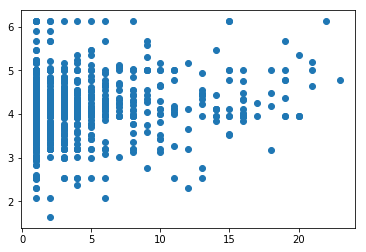

In [31]:
from sklearn.metrics import mean_squared_error # Metric
from sklearn.linear_model import LinearRegression # Algorithm

# Divide data into features(X) and labels(y).
X =  df.loc[ :, ['sentiment','retweets']] # features
y =  df.loc[ :, 'hashtags_number'] # label, value to predict

# Split both features(X) and labels(y) into training and testing datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Load and define Linear Regression.
LR = LinearRegression( fit_intercept=True, # Calculate the intercept.
                       normalize=True, # Normalized regressors (substract the mean, divide by l2-norm).
                       copy_X=True, # X will be copied; else, it may be overwritten.
                       n_jobs=None) # If more complex data, might result on speed.

# Fit data into model.
LR.fit(X_train, y_train, sample_weight=None)

# Results.
coef = LR.coef_
intercept = LR.intercept_
r_squared_train = round(LR.score(X_train, y_train), 2)
r_squared_test  = round(LR.score(X_test,  y_test), 2)
predictions = LR.predict(X_test) # Predictions as an array.

# Display results.
print('R-squared - train: {}\nR-squared - test:  {}\nCoefficient: {}\nIntercept:  {}\nFirst three predictions (of {}): {} ...'.format(r_squared_train, r_squared_test, coef, intercept, len(predictions), predictions[:3]))
plt.scatter(y_test, predictions)
plt.show()

#### b) Polynomial Regression

R-squared - train: 0.02
R-squared - test:  0.02
Coefficient: [0.00000000e+00 7.65700227e-03 9.99999343e-05]
Intercept:  0.07550918022140342


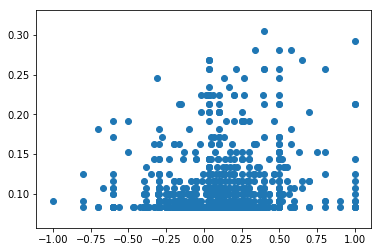

In [33]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Divide data into features(X) and labels(y).
X =  df.loc[ :, ['hashtags_number','retweets']] # features
y =  df.loc[ :, 'sentiment'] # label, value to predict

# Transform features: Polynomial
poly = PolynomialFeatures(degree=2, # The degree of the polynomial features. Default = 2.
                          interaction_only=False, # If true, only interaction features are produced: features that are products of at most degree distinct input features (so not x[1] ** 2, x[0] * x[2] ** 3, etc.).
                          include_bias=True) # If True (default), then include a bias column, the feature in which all polynomial powers are zero (i.e. a column of ones - acts as an intercept term in a linear model).

# Split both features(X) and labels(y) into training and testing datasets.
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state = 0)

# Load and define Polynomial Regression.
PLR = LinearRegression(fit_intercept=True, # Intercept
                       normalize=False, # Normalized regressors, substract the mean, divide by l2-norm.
                       copy_X=True, # X will be copied; else, it may be overwritten.
                       n_jobs=None) # Speedup for n_targets > 1 and sufficient large problems.

# Fit data into model.
PLR.fit(X_train, y_train, sample_weight=None)

# Results.
coef = PLR.coef_
intercept = PLR.intercept_
r_squared_train = round(PLR.score(X_train, y_train), 2)
r_squared_test  = round(PLR.score(X_test,  y_test), 2)
predictions = PLR.predict(X_test) # an array.

# Display results.
print('R-squared - train: {}\nR-squared - test:  {}\nCoefficient: {}\nIntercept:  {}\nFirst three predictions (of {}): {} ...'.format(r_squared_train, r_squared_test, coef, intercept, len(predictions), predictions[:3]))
plt.scatter(y_test, predictions)
plt.show()

#### c) Ridge Regression

R-squared - train: 0.02
R-squared - test:  0.02
Coefficient: [0.         0.03329575 0.00978659]
Intercept:  0.11091065238213316


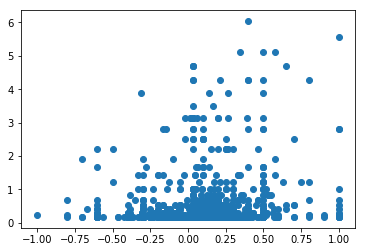

In [35]:
import os # File management 
import pandas as pd # Data tables
from sklearn.model_selection import train_test_split # Splitting data
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

import numpy as np
import matplotlib.pyplot as plt

# Get right data from data frame
X = df.loc[:,['retweets']] # 'retweet_count', 'sentiment'
y = df.sentiment # retweet_count

# Split data into training set and testing set.
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state = 0)

# Transform features: normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ridge regression.
RR = Ridge(alpha=20.0, solver="cholesky").fit(X_train_scaled, y_train)

# Predicted R-squared metric.
r_squared_train = round(RR.score(X_train_scaled, y_train), 2)
r_squared_test  = round(RR.score(X_test_scaled,  y_test), 2)

# Predictions as an array.
predictions = RR.predict(X_test)

# Results: R-squared, coefficient, intercept
print('R-squared - train: {}\nR-squared - test:  {}'.format(r_squared_train, r_squared_test))
print('Coefficient: {}\nIntercept:  {}'.format(RR.coef_, RR.intercept_))

# Ploted result: predictions in compare to values.
plt.scatter(y_test, predictions)
plt.show()

#### d) Polynomial Ridge Regression

R-squared - train: -0.01
R-squared - test:  -0.0
Coefficient: [0.         0.00765576 0.00010006]
Intercept:  0.0755118709545669


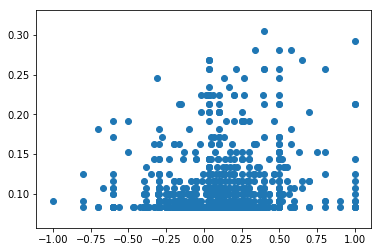

In [37]:
from sklearn.preprocessing import StandardScaler  # ?
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

# Features(X) and label(y). Algorithm use first to predict former.
X = df.loc[:,['hashtags_number']] # 'retweet_count', 'sentiment'
y = df.sentiment # retweet_count

# Transform features: Polynomial
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Split data into training set and testing set.
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state = 0)

# Polynomial Ridge Regression model with a regularization penalty.
PRR = Ridge().fit(X_train, y_train)

# Predicted R-squared metric.
r_squared_train = round(PRR.score(X_train_scaled, y_train), 2)
r_squared_test  = round(PRR.score(X_test_scaled,  y_test), 2)

# Predictions as an array.
predictions = PRR.predict(X_test)

# Results: R-squared, coefficient, intercept
print('R-squared - train: {}\nR-squared - test:  {}'.format(r_squared_train, r_squared_test))
print('Coefficient: {}\nIntercept:  {}'.format(PRR.coef_, PRR.intercept_))

# Ploted result: predictions in compare to values.
plt.scatter(y_test, predictions)
plt.show()

#### e) Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

# Divide data into features(X) and labels(y).
y =  df.loc[ :, 'sentiment_class'] # column of labels to predict
X =  df.loc[ :, ['retweets', 'likes', 'hashtags_number']] # columns of features used to predict label

# Split both features(X) and labels(y) into training and testing datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Load and define Logistic Regression model.
LGR = LogisticRegression(penalty='l2', 
                         dual=False, 
                         tol=0.0001, 
                         C=1.0, 
                         fit_intercept=True, 
                         intercept_scaling=1, 
                         class_weight=None, 
                         random_state=None, 
                         solver='warn', 
                         max_iter=100, 
                         multi_class='warn', 
                         verbose=0, 
                         warm_start=False, 
                         n_jobs=None)

# Fit data into model.
LGR.fit(X_train, y_train)

# Results.
accuracy_train = round(LGR.score(X_train, y_train), 2)
accuracy_test  = round(LGR.score(X_test,  y_test), 2)
predictions = LGR.predict(X_test)
probabilities = LGR.predict_proba(X_test)

# Display results.
print('Accuracy - train: {}\nAccuracy - test:  {}\nFirst three predictions (of {}): {} ...\nFirst three propabilities (of {}): {} ...'.format(accuracy_train, accuracy_test, len(predictions), predictions[:3], len(probabilities), probabilities[:3]))
plt.scatter(y_test, predictions)
plt.show()

Accuracy - train: 0.71
Accuracy - test:  0.7


#### f) Lasso Regression

R-squared - train: 0.0
R-squared - test:  -0.0
Coefficient: [-0.]
Intercept:  0.11091065238213316


<function matplotlib.pyplot.show(*args, **kw)>

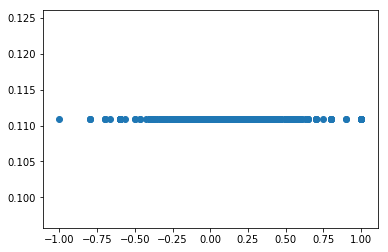

In [42]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

# Prepare data.
X = df.loc[:,['retweets']]
y = df.sentiment
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# Transform features: normalization
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lasso Regression.
LASSO = Lasso(alpha=2.0, max_iter = 10000).fit(X_train_scaled, y_train)

# Predicted R-squared metric.
r_squared_train = round(LASSO.score(X_train_scaled, y_train), 2)
r_squared_test  = round(LASSO.score(X_test_scaled,  y_test), 2)

# Predictions as an array.
predictions = LASSO.predict(X_test)

# Results: R-squared, coefficient, intercept
print('R-squared - train: {}\nR-squared - test:  {}'.format(r_squared_train, r_squared_test))
print('Coefficient: {}\nIntercept:  {}'.format(LASSO.coef_, LASSO.intercept_))

# Ploted result: predictions in compare to values.
plt.scatter(y_test, predictions)
plt.show

#### g) SGD Regressor

In [58]:
import os # File management 
import pandas as pd # Data tables
from sklearn.model_selection import train_test_split # Splitting data
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import accuracy_score 

# Load CSV file data (cleaned and preprocessed) as dataframe.
fp = os.path.join('', 'tweets_sentiment.csv') # .join(folder, file)
df = pd.read_csv(fp, sep='\t', encoding='utf-8')

# Prepare data.
y =  df.loc[ :, 'hashtags_number'] # label to predict
X =  df.loc[ :, ['retweets', 'likes']] # features used to predict label

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# Fit data to SGD Regressor.
SGDR = SGDRegressor(max_iter=50, penalty=None, eta0=0.1).fit(X, y.ravel())

# Predicted accuracy.
accuracy_train = round(SGDR.score(X_train, y_train), 2)
accuracy_test  = round(SGDR.score(X_test,  y_test), 2)

# Predictions.
predictions = SGDR.predict(X_test)

print('Metric - train: {}\nMetric - test:  {}'.format(accuracy_train, accuracy_test))
#print('Coefficients:\n', clf.coef_)
#print('Intercepts:\n', clf.intercept_)

#####

Metric - train: -1.1123223562482885e+31
Metric - test:  -8.944882049058729e+28


#### h) ElasticNet

In [52]:
# Divide data into features(X) and labels(y).
X =  df.loc[ :, ['hashtags_number','retweets']] # features
y =  df.loc[ :, 'likes'] # label, value to predict

# Split both features(X) and labels(y) into training and testing datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Load and define ElasticNet.
ENET = ElasticNet( 
                  alpha=1.0, 
                  l1_ratio=0.5, 
                  fit_intercept=True, 
                  normalize=False, 
                  precompute=False, 
                  max_iter=1000, 
                  copy_X=True, 
                  tol=0.0001, 
                  warm_start=False, 
                  positive=False, 
                  random_state=None, 
                  selection='cyclic',
                 )
# Fit data into model.
ENET.fit(X_train, y_train)

# Results.
coef = ENET.coef_
intercept = ENET.intercept_
r_squared_train = round(ENET.score(X_train, y_train), 2)
r_squared_test  = round(ENET.score(X_test,  y_test), 2)
predictions = ENET.predict(X_test) # an array.

# Display results.
print('R-squared - train: {}\nR-squared - test:  {}\nCoefficient: {}\nIntercept:  {}\nFirst three predictions (of {}): {} ...'.format(r_squared_train, r_squared_test, coef, intercept, len(predictions), predictions[:3]))
plt.scatter(y_test, predictions)
plt.show()

Accuracy - train: 0.02
Accuracy - test:  -0.58


#### i) Stepwise regression

#### 2. Instance Based

#### a) K-Nearest Neighbours (KNN)

In [217]:
from sklearn.neighbors import KNeighborsClassifier

# Divide data into features(X) and labels(y).
y =  df.loc[ :, 'sentiment_class'] # column of labels to predict
X =  df.loc[ :, ['retweets', 'likes', 'hashtags_number']] # columns of features used to predict label

# Split both features(X) and labels(y) into training and testing datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Load and define KNN model.
KNN = KNeighborsClassifier(n_neighbors=5,
                           weights='uniform', 
                           algorithm='auto', 
                           leaf_size=30, 
                           p=2, 
                           metric='minkowski', 
                           metric_params=None, 
                           n_jobs=None)

# Fit data into model.
KNN.fit(X_train, y_train)

# Results.
accuracy_train = round(KNN.score(X_train, y_train), 2)
accuracy_test  = round(KNN.score(X_test,  y_test), 2)
predictions = KNN.predict(X_test)
probabilities = KNN.predict_proba(X_test)

# Display results.
print('Accuracy - train: {}\nAccuracy - test:  {}\nFirst three predictions (of {}): {} ...\nFirst three propabilities (of {}): {} ...'.format(accuracy_train, accuracy_test, len(predictions), predictions[:3], len(probabilities), probabilities[:3]))
plt.scatter(y_test, predictions)
plt.show()

Accuracy - train: 0.28
Accuracy - test:  0.24


## 3. Support Vector Machines

#### a) Support Vector Machines - SVC

In [ ]:
import os # File management 
import pandas as pd # Data tables
from sklearn.model_selection import train_test_split # Splitting data
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score 

# Load CSV file data (cleaned and preprocessed) as dataframe.
fp = os.path.join('', 'tweets_sentiment.csv') # .join(folder, file)
df = pd.read_csv(fp, sep='\t', encoding='utf-8')

# Prepare data.
y =  df.loc[ :, 'hashtags_number'] # label to predict
X =  df.loc[ :, ['retweets', 'likes']] # features used to predict label
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# Fit data to SVC.
SVC = SVC(kernel = 'linear', C=1.0).fit(X_train, y_train)

# Predicted accuracy.
accuracy_train = round(SVC.score(X_train, y_train), 2)
accuracy_test  = round(SVC.score(X_test,  y_test), 2)

# Predictions.
predictions = SVC.predict(X_test)

# Propabilities.
probabilities = SVC.predict_proba(X_test)

print('Accuracy - train: {}\nAccuracy - test:  {}'.format(accuracy_train, accuracy_test))

#### b) Support Vector Machines - Linear SVC

In [ ]:
import os # File management 
import pandas as pd # Data tables
from sklearn.model_selection import train_test_split # Splitting data
from sklearn.svm import LinearSVC # Linear SVC
from sklearn.metrics import accuracy_score 

# Load CSV file data (cleaned and preprocessed) as dataframe.
fp = os.path.join('', 'tweets_sentiment.csv') # .join(folder, file)
df = pd.read_csv(fp, sep='\t', encoding='utf-8')

# Prepare data.
y =  df.loc[ :, 'hashtags_number'] # label to predict
X =  df.loc[ :, ['retweets', 'likes']] # features used to predict label
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# Fit data to Linear SVC.
LSVC = LinearSVC(C=5, random_state = 67).fit(X_train, y_train)

# Predicted accuracy.
accuracy_train = round(LSVC.score(X_train, y_train), 2)
accuracy_test  = round(LSVC.score(X_test,  y_test), 2)

# Predictions.
predictions = LSVC.predict(X_test)

# Propabilities.
probabilities = LSVC.predict_proba(X_test)

print('Accuracy - train: {}\nAccuracy - test:  {}'.format(accuracy_train, accuracy_test))
#print('Coefficients:\n', clf.coef_)
#print('Intercepts:\n', clf.intercept_)

#### c) Support Vector Machines - SVR

In [ ]:
# Poly SVM
import os # File management 
import pandas as pd # Data tables
from sklearn.model_selection import train_test_split # Splitting data
from sklearn.svm import SVR # SVR
from sklearn.metrics import accuracy_score 

# Load CSV file data (cleaned and preprocessed) as dataframe.
fp = os.path.join('', 'tweets_sentiment.csv') # .join(folder, file)
df = pd.read_csv(fp, sep='\t', encoding='utf-8')

# Prepare data.
y =  df.loc[ :, 'hashtags_number'] # label to predict
X =  df.loc[ :, ['retweets', 'likes']] # features used to predict label
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# Fit data to SVR.
PSVR = SVR(kernel="poly", degree=2, C=100, epsilon=0.1).fit(X, y)

# Predicted accuracy.
accuracy_train = round(PSVR.score(X_train, y_train), 2)
accuracy_test  = round(PSVR.score(X_test,  y_test), 2)

# Predictions.
predictions = PSVR.predict(X_test)

# Propabilities.
probabilities = PSVR.predict_proba(X_test)

print('Accuracy - train: {}\nAccuracy - test:  {}'.format(accuracy_train, accuracy_test))

#### d) Support Vector Machines - Linear SVR

In [221]:
import os # File management 
import pandas as pd # Data tables
from sklearn.model_selection import train_test_split # Splitting data
from sklearn.svm import LinearSVR # Linear SVR
from sklearn.metrics import accuracy_score 

# Load CSV file data (cleaned and preprocessed) as dataframe.
fp = os.path.join('', 'tweets_sentiment.csv') # .join(folder, file)
df = pd.read_csv(fp, sep='\t', encoding='utf-8')

# Prepare data.
y =  df.loc[ :, 'hashtags_number'] # label to predict
X =  df.loc[ :, ['retweets', 'likes']] # features used to predict label
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# Fit data to Linear SVR.
LSVR = LinearSVR(epsilon=1.5, random_state = 67).fit(X_train, y_train)

# Predicted accuracy.
accuracy_train = round(LSVR.score(X_train, y_train), 2)
accuracy_test  = round(LSVR.score(X_test,  y_test), 2)

# Predictions.
predictions = LSVR.predict(X_test)

# Propabilities.
#probabilities = LSVR.predict_proba(X_test)

print('Accuracy - train: {}\nAccuracy - test:  {}'.format(accuracy_train, accuracy_test))
#print('Coefficients:\n', clf.coef_)
#print('Intercepts:\n', clf.intercept_)

Accuracy - train: -0.09
Accuracy - test:  -1.54


## 4. Bayesian

#### a) Gaussian Naive Bayes

In [44]:
import os # File management 
import pandas as pd # Data tables
from sklearn.model_selection import train_test_split # Splitting data
from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bayes

# Prepare data.
y =  df.loc[ :, 'sentiment_class'] # label to predict
X =  df.loc[ :, ['retweets', 'likes', 'hashtags_number']] # features used to predict label
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# Fit data to Gaussian Naive Bayes.
GNB = GaussianNB().fit(X_train, y_train)

# Predicted accuracy.
accuracy_train = round(GNB.score(X_train, y_train), 2)
accuracy_test  = round(GNB.score(X_test,  y_test), 2)

# Predictions.
predictions = GNB.predict(X_test)

# Propabilities.
probabilities = GNB.predict_proba(X_test)

print('Accuracy - train: {}\nAccuracy - test:  {}'.format(accuracy_train, accuracy_test))

Accuracy - train: 0.71
Accuracy - test:  0.7


#### b) Multinomial Naive Bayes

In [33]:
import os # File management 
import pandas as pd # Data tables
from sklearn.model_selection import train_test_split # Splitting data
from sklearn.naive_bayes import MultinomialNB # Naive Bayes (Multinomial) algorithm

# Load CSV file data (cleaned and preprocessed) as dataframe.
fp = os.path.join('', 'tweets_sentiment.csv') # .join(folder, file)
df = pd.read_csv(fp, sep='\t', encoding='utf-8')

# Prepare data.
y =  df.loc[ :, 'sentiment_class'] # label to predict
X =  df.loc[ :, ['retweets', 'likes', 'hashtags_number']] # features used to predict label
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# Fit data to Gaussian Naive Bayes.
MNB = MultinomialNB().fit(X_train, y_train)

# Predicted accuracy.
accuracy_train = round(MNB.score(X_train, y_train), 2)
accuracy_test  = round(MNB.score(X_test,  y_test), 2)

# Predictions.
predictions = MNB.predict(X_test)

# Propabilities.
probabilities = MNB.predict_proba(X_test)

print('Accuracy - train: {}\nAccuracy - test:  {}'.format(accuracy_train, accuracy_test))

Accuracy - train: 0.7
Accuracy - test:  0.69


#### c) BBN - Bayesian Belief Network

## 5. Rule system

#### a) One Rule

#### b) Zero Rule

#### c) Repeated Incremental Pruning to Produce Error Reduction

## 6. Decision Trees

#### a) Decision Tree Classifier 

In [40]:
import os # File management 
import pandas as pd # Data tables
from sklearn.model_selection import train_test_split # Splitting data
from sklearn.tree import DecisionTreeClassifier # Algorithm

# Load CSV file data (cleaned and preprocessed) as dataframe.
fp = os.path.join('', 'tweets_sentiment.csv') # .join(folder, file)
df = pd.read_csv(fp, sep='\t', encoding='utf-8')

# Prepare data.
y =  df.loc[ :, 'sentiment_class'] # label to predict
X =  df.loc[ :, ['retweets', 'likes', 'hashtags_number']] # features used to predict label
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# Fit data to Decision Tree Classifier.
DTC = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 8, random_state = 0).fit(X_train, y_train)

# Predicted accuracy.
accuracy_train = round(DTC.score(X_train, y_train), 2)
accuracy_test  = round(DTC.score(X_test,  y_test), 2)

# Predictions.
predictions = DTC.predict(X_test)

# Propabilities.
probabilities = DTC.predict_proba(X_test)

print('Accuracy - train: {}\nAccuracy - test:  {}'.format(accuracy_train, accuracy_test))

Accuracy - train: 0.71
Accuracy - test:  0.7


#### b) Decision Tree Regressor

In [46]:
import os # File management 
import pandas as pd # Data tables
from sklearn.model_selection import train_test_split # Splitting data
from sklearn.tree import DecisionTreeRegressor # Decision Tree (Regressor) algorithm

# Load CSV file data (cleaned and preprocessed) as dataframe.
fp = os.path.join('', 'tweets_sentiment.csv') # .join(folder, file)
df = pd.read_csv(fp, sep='\t', encoding='utf-8')

# Prepare data.
y =  df.loc[ :, 'hashtags_number'] # label to predict
X =  df.loc[ :, ['retweets', 'likes']] # features used to predict label
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# Fit data to Decision Tree Regressor.
DTR = DecisionTreeRegressor(max_depth = 4, min_samples_leaf = 8, random_state = 0).fit(X_train, y_train)

# Predicted accuracy.
accuracy_train = round(DTR.score(X_train, y_train), 2)
accuracy_test  = round(DTR.score(X_test,  y_test), 2)

# Predictions.
predictions = DTR.predict(X_test)

# Propabilities.
# None

print('Accuracy - train: {}\nAccuracy - test:  {}'.format(accuracy_train, accuracy_test))

Accuracy - train: 0.14
Accuracy - test:  0.12


#### c) CHAID - Chi-squared Automatic Interaction Detection

#### d) Conditional Decision Tree

## 7. Ensemble

#### a) Random forest

In [45]:
from sklearn.ensemble import RandomForestClassifier # Algorithm

# Divide data into features(X) and labels(y).
y =  df.loc[ :, 'sentiment_class'] # column of labels to predict
X =  df.loc[ :, ['retweets', 'likes', 'hashtags_number']] # columns of features used to predict label

# Split both features(X) and labels(y) into training and testing datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Load and define Random Forest.
RF = RandomForestClassifier(n_estimators='warn', 
                            criterion='gini', 
                            max_depth=None, 
                            min_samples_split=2, 
                            min_samples_leaf=1, 
                            min_weight_fraction_leaf=0.0, 
                            max_features='auto', 
                            max_leaf_nodes=None, 
                            min_impurity_decrease=0.0, 
                            min_impurity_split=None, 
                            bootstrap=True, 
                            oob_score=False, 
                            n_jobs=None, 
                            random_state=None, 
                            verbose=0, 
                            warm_start=False, 
                            class_weight=None)
# Fit data into model.
RF.fit(X_train, y_train)

# Results.
accuracy_train = round(RF.score(X_train, y_train), 2)
accuracy_test  = round(RF.score(X_test,  y_test), 2)
predictions = RF.predict(X_test) # an array.
probabilities = RF.predict_proba(X_test) # an array.

# Display results.
print('Accuracy - train: {}\nAccuracy - test:  {}\nFirst three predictions (of {}): {} ...\nFirst three propabilities (of {}): {} ...'.format(accuracy_train, accuracy_test, len(predictions), predictions[:3], len(probabilities), probabilities[:3]))
plt.scatter(y_test, predictions)
plt.show()

Accuracy - train: 0.76
Accuracy - test:  0.67


#### b) Gradient Boosting Classifier

In [49]:
from sklearn.ensemble import GradientBoostingClassifier

# Divide data into features(X) and labels(y).
y =  df.loc[ :, 'sentiment_class'] # column of labels to predict
X =  df.loc[ :, ['retweets', 'likes', 'hashtags_number']] # columns of features used to predict label

# Split both features(X) and labels(y) into training and testing datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Load and define Gradient Boosting Classifier.
GBC = GradientBoostingClassifier(loss='deviance', 
                                 learning_rate=0.1, 
                                 n_estimators=100, 
                                 subsample=1.0, 
                                 criterion='friedman_mse', 
                                 min_samples_split=2, 
                                 min_samples_leaf=1, 
                                 min_weight_fraction_leaf=0.0, 
                                 max_depth=3, 
                                 min_impurity_decrease=0.0, 
                                 min_impurity_split=None, 
                                 init=None, 
                                 random_state=None, 
                                 max_features=None, 
                                 verbose=0, 
                                 max_leaf_nodes=None, 
                                 warm_start=False, 
                                 presort='auto', 
                                 validation_fraction=0.1, 
                                 n_iter_no_change=None, 
                                 tol=0.0001)

# Fit data into model.
GBC.fit(X_train, y_train)

# Results.
accuracy_train = round(GBC.score(X_train, y_train), 2)
accuracy_test  = round(GBC.score(X_test,  y_test), 2)
predictions = GBC.predict(X_test) # an array.
probabilities = GBC.predict_proba(X_test) # an array.

# Display results.
print('Accuracy - train: {}\nAccuracy - test:  {}\nFirst three predictions (of {}): {} ...\nFirst three propabilities (of {}): {} ...'.format(accuracy_train, accuracy_test, len(predictions), predictions[:3], len(probabilities), probabilities[:3]))
plt.scatter(y_test, predictions)
plt.show()

Accuracy - train: 0.41
Accuracy - test:  0.42


#### c) Gradient Boosting Regressor

In [26]:
from sklearn.ensemble import GradientBoostingRegressor

# Divide data into features(X) and labels(y).
y =  df.loc[ :, 'sentiment'] # column of labels to predict
X =  df.loc[ :, ['retweets', 'likes', 'hashtags_number']] # columns of features used to predict label

# Split both features(X) and labels(y) into training and testing datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Load and define Gradient Boosting Regressor.
GBR = GradientBoostingRegressor(loss='ls', 
                                learning_rate=0.1, 
                                n_estimators=100, 
                                subsample=1.0, 
                                criterion='friedman_mse', 
                                min_samples_split=2, 
                                min_samples_leaf=1,
                                min_weight_fraction_leaf=0.0, 
                                max_depth=3, 
                                min_impurity_decrease=0.0, 
                                min_impurity_split=None, 
                                init=None, 
                                random_state=None, 
                                max_features=None, 
                                alpha=0.9, 
                                verbose=0, 
                                max_leaf_nodes=None, 
                                warm_start=False, 
                                presort='auto', 
                                validation_fraction=0.1, 
                                n_iter_no_change=None, 
                                tol=0.0001)

# Fit data into model.
GBR.fit(X_train, y_train)

# Results.
r_squared_train = round(GBR.score(X_train, y_train), 2)
r_squared_test  = round(GBR.score(X_test,  y_test), 2)
predictions = GBR.predict(X_test) # an array.
# feature_importances_

# Display results.
print('R-squared - train: {}\nR-squared - test:  {}\nFirst three predictions (of {}): {} ...'.format(r_squared_train, r_squared_test, len(predictions), predictions[:3]))
plt.scatter(y_test, predictions)
plt.show()

Accuracy - train: 0.11
Accuracy - test:  0.1


#### d) Bagging

In [46]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
# Prepare data.
y =  df.loc[ :, 'sentiment_class'] # label to predict
X =  df.loc[ :, ['retweets', 'likes', 'hashtags_number']] # features used to predict label
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# Fit data to random forest algorithm.
BAG = BaggingClassifier( DecisionTreeClassifier(splitter="random", max_leaf_nodes=8), n_estimators=300, max_samples=100, bootstrap=True, n_jobs=-1, oob_score=True)
BAG.fit(X_train, y_train)

y_pred = BAG.predict(X_test)

# Predicted accuracy.
# accuracy_score(y_test, y_pred)

accuracy_train = round(BAG.score(X_train, y_train), 2)
accuracy_test  = round(BAG.score(X_test,  y_test), 2)
#bag_clf.oob_score_


# Predictions.
predictions = BAG.predict(X_test)

# Propabilities.
probabilities = BAG.predict_proba(X_test)

print('Accuracy - train: {}\nAccuracy - test:  {}'.format(accuracy_train, accuracy_test))

Accuracy - train: 0.71
Accuracy - test:  0.7


#### e) Ada Boost

In [47]:
from sklearn.ensemble import AdaBoostClassifier

# Prepare data.
y =  df.loc[ :, 'hashtags_number'] # label to predict
X =  df.loc[ :, ['retweets', 'likes']] # features used to predict label
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# Fit data to ADA Boost.
ADA = AdaBoostClassifier( DecisionTreeClassifier( max_depth=1), n_estimators=200, algorithm="SAMME.R", learning_rate=0.5)
ADA = ADA.fit(X_train, y_train)

# Predicted accuracy.
accuracy_train = round(ADA.score(X_train, y_train), 2)
accuracy_test  = round(ADA.score(X_test,  y_test), 2)

# Predictions.
predictions = ADA.predict(X_test)

# Propabilities.
probabilities = ADA.predict_proba(X_test)

print('Accuracy - train: {}\nAccuracy - test:  {}'.format(accuracy_train, accuracy_test))

Accuracy - train: 0.33
Accuracy - test:  0.34


## 8. Clustering

#### a) K-Means

In [55]:
import os # File management 
import pandas as pd # Data tables
from sklearn.model_selection import train_test_split # Splitting data
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score 

# Load CSV file data (cleaned and preprocessed) as dataframe.
fp = os.path.join('', 'tweets_sentiment.csv') # .join(folder, file)
df = pd.read_csv(fp, sep='\t', encoding='utf-8')

# Prepare data.
y =  df.loc[ :, 'hashtags_number'] # label to predict
X =  df.loc[ :, ['retweets', 'likes']] # features used to predict label
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# Fit data to K Means.
KM = KMeans(n_clusters=3, random_state=0).fit(X_train, y_train)

# Predicted accuracy.
accuracy_train = round(KM.score(X_train, y_train), 2)
accuracy_test  = round(KM.score(X_test,  y_test), 2)

# Predictions.
predictions = KM.predict(X_test)

print('Metric - train: {}\nMetric - test:  {}'.format(accuracy_train, accuracy_test))
#print('Coefficients:\n', clf.coef_)
#print('Intercepts:\n', clf.intercept_)

Metric - train: -16180677.45
Metric - test:  -2414390.08


#### b) KN-Means

#### c) K-Medians

#### d) Hierarchical Clustering

## 9. Dimensionallity Reduction:

#### PCA - Principial Component Analysis

#### LDA - Linear Discriminant Analysis

#### RDA - Principial Component Regression
 




More algorithms will be added later. 

# 4. Commonly used

Commonly used:
1. Basics
2. Feature transformation
3. Metrics
4. Tunning
5. Pipelines

## 1. Basics

In [ ]:
# Build-in datasets:
from sklearn.datasets import load_iris
iris = datasets.load_iris()

from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')


# Data generators:

from sklearn.datasets.samples_generator import make_swiss_roll


# Train / Test split:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)


# Model Fitting:

# Supervised.
lr.fit(X_train, y_train) # svc, knn (...)

# Unsupervised.
k_means.fit(X_train)

# Dimension Reduction.
pca_model = pca.fit_transform(X_train)


# Predictions:

# Predict labels value.
predictions = lr.predict(X_test) # k_means, svc (...)

# Predict labels propability.
propabilities = knn.predict_proba(X_test) 

## 2. Feature transformation

Preprocessing data (more in data-preprocessing-toolkit)

In [ ]:
# Missing Values
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values=0, strategy='mean', axis=0)
imp.fit_transform(X_train)

# Standarization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
standardized_X = scaler.transform(X_train)
standardized_X_test = scaler.transform(X_test)

# Normalization
from sklearn.preprocessing import Normalizer
scaler = Normalizer().fit(X_train)
normalized_X = scaler.transform(X_train)
normalized_X_test = scaler.transform(X_test)

# Binarization
from sklearn.preprocessing import Binarizer
binarizer = Binarizer(threshold=0.0).fit(X)
binary_X = binarizer.transform(X)

# Encoding Categorical Features
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
y = enc.fit_transform(y)

# Generating Polynomial Features
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(5)
poly.fit_transform(X)

# One hot encoding
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
DATA_onehot = encoder.fit_transform(DATA.reshape(-1,1))
DATA_onehot

## 3. Metrics

In [ ]:
# Classification metrics
# ----------------------

knn.score(X_test, y_test) # Estimator score method

# Accuracy Score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

# Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

# Recall
from sklearn.metrics import recall_score
print(recall_score(true_labels, guesses))

# Precision score
from sklearn.metrics import precision_score
print(precision_score(true_labels, guesses))

# F1
from sklearn.metrics import f1_score
print(f1_score(true_labels, guesses))


# Regression Metrics
# ------------------

# Mean Absolute Error
from sklearn.metrics import mean_absolute_error
y_true = [3, -0.5, 2]
mean_absolute_error(y_true, y_pred)

# Mean Squared Error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

# R² Score
from sklearn.metrics import r2_score
r2_score(y_true, y_pred)


# Clustering Metrics
# ------------------

# Adjusted Rand Index
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(y_true, y_pred)

# Homogeneity
from sklearn.metrics import homogeneity_score
homogeneity_score(y_true, y_pred)

# V-measure
from sklearn.metrics import v_measure_score
metrics.v_measure_score(y_true, y_pred)

## 4. Model tuning

## 5. Pipelines

To be updated.

By Luke, 10 II 2019.